# Assignment on Python Libraries
*   The dataset for this assignment is provided in the same folder as the assignment.
*   Try to write optimal code for each section and explain your understanding wherever required.
*  Required Libraries are imported wherever needed.
*   It's suggested to do it after studying all topics to reinforce your learning. Just a reminder, this assignment can be done in 10min using A.I, which will increase your skill of chatting with chatgpt (**but nothing else**), so try to approach with a bit more purpose.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(5)

5


### Read the csv and store it in a dataframe named mobile_usage
*  Identify the null values in the dataframe and print the count of null values in each column

In [10]:
mobile_usage=pd.read_csv('mobile_usage_behavioral_analysis.csv')
l=list(np.zeros_like(mobile_usage.columns.tolist()))
for i in range(len(l)):
    l[i]=0


In [16]:
for i in range(len(mobile_usage.columns.tolist())):
    for j in range(len(mobile_usage)):
        if pd.isnull(mobile_usage.iloc[j,i]):
            l[i]=l[i]+1
for i in range(len(l)):
    print(f"{mobile_usage.columns.tolist()[i]}: {l[i]}")

User_ID: 1000
Age: 1000
Gender: 0
Total_App_Usage_Hours: 0
Daily_Screen_Time_Hours: 0
Number_of_Apps_Used: 0
Social_Media_Usage_Hours: 0
Productivity_App_Usage_Hours: 0
Gaming_App_Usage_Hours: 0
Location: 0


#Identify Different dtypes of the columns

In [17]:
print(mobile_usage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB
None


#Get the count of number of people of each age  in the dataset and store it in a 2-d numpy array with first element in row being age and second element number of people with that age.

In [22]:
age=list(mobile_usage['Age'].tolist())
n=[]
for i in age:
    if [i,age.count(i)] not in n:
        n.append([i,age.count(i)])
n=np.array(n)
print(n)

[[56 28]
 [46 23]
 [32 22]
 [25 27]
 [38 20]
 [36 21]
 [40 25]
 [28 23]
 [41 27]
 [53 25]
 [57 23]
 [20 25]
 [39 24]
 [19 27]
 [47 24]
 [55 20]
 [50 37]
 [29 23]
 [42 27]
 [44 18]
 [59 19]
 [45 30]
 [33 21]
 [54 31]
 [24 15]
 [26 21]
 [35 17]
 [21 21]
 [31 24]
 [43 34]
 [37 19]
 [52 32]
 [34 24]
 [23 25]
 [51 19]
 [27 20]
 [48 18]
 [58 19]
 [18 27]
 [22 29]
 [30 20]
 [49 26]]


#Calculate the average usage_time for different age groups and identify the age group with the highest total usage_time (screen time).
#Plot graphs of average usage_time versus age:
* Scatter plot
* Bar graph

30


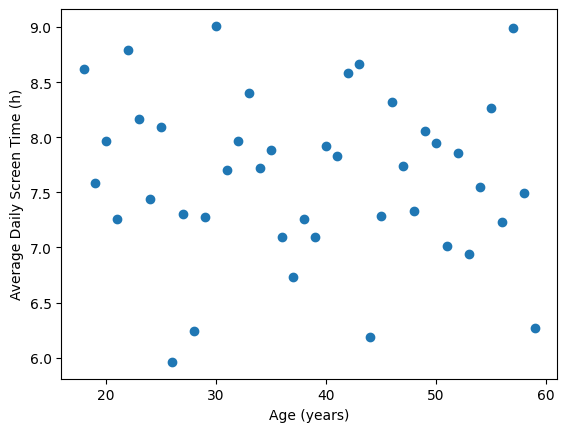

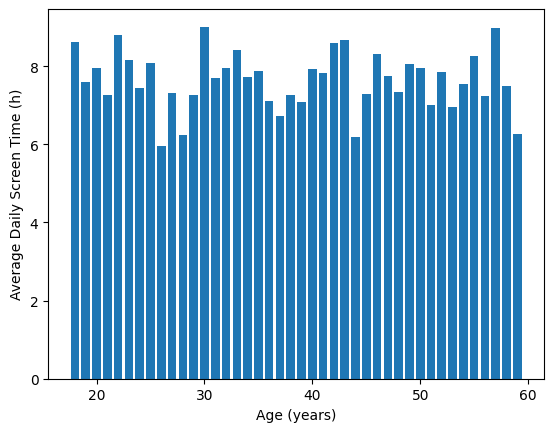

In [37]:
d={}
for i in age:
    d[i]=mobile_usage[mobile_usage['Age']==i]['Daily_Screen_Time_Hours'].mean()
for i in d:
    if d[i]==max(list(d.values())):
        print(i)
        break
plt.scatter(list(d.keys()),list(d.values()))
plt.xlabel('Age (years)')
plt.ylabel('Average Daily Screen Time (h)')
plt.show()
plt.bar(list(d.keys()),list(d.values()))
plt.xlabel('Age (years)')
plt.ylabel('Average Daily Screen Time (h)')
plt.show()

#Sort the DataFrame by age using both Pandas and NumPy.
* Remove the data of individuals above 45 years of age and  store the modified DataFrame in a new variable new_df.

In [39]:
mobile_usage.sort_values('Age',inplace=True)

In [40]:
print(mobile_usage.head())

     User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
924      925   18    Male                   5.54                     2.01   
397      398   18  Female                   8.94                     7.09   
80        81   18    Male                   7.57                    10.63   
563      564   18    Male                   7.58                     7.26   
353      354   18    Male                   5.65                     8.34   

     Number_of_Apps_Used  Social_Media_Usage_Hours  \
924                   28                      1.23   
397                   22                      3.67   
80                     9                      0.06   
563                   22                      4.00   
353                   13                      3.83   

     Productivity_App_Usage_Hours  Gaming_App_Usage_Hours  Location  
924                          3.15                    1.67  New York  
397                          2.43                    2.81  New York  
80

### Add a New Column **location_type**
*  Create a new column named location_type in the original DataFrame (mobile_usage).
*  Assign integer labels to locations based on their frequency (in descending order):
 *  The most frequent location should be labeled as 0.
 *  The second most frequent location should be labeled as 1, and so on.
 *  Less frequent locations will have higher integer values.
*  Ensure that the labels are assigned based strictly on the frequency ranking of the locations.

In [49]:
lo=list(mobile_usage['Location'])
d={}
for i in lo:
    if i not in list(d.keys()):
        d[i]=1
    else:
        d[i]+=1
di=dict(sorted(d.items(), key=lambda item:item[1], reverse=True))
k=list(di.keys())
mobile_usage['location_type']=mobile_usage['Location'].apply(lambda x: k.index(x))

### Normalisation
 Normalization is a process used to adjust the scale or range of data values, making them consistent and comparable across different features or datasets. It ensures that all features contribute equally to a model or analysis, especially when they have vastly different scales.

 Just understand the definition for now , in the upcoming weeks this topic will be discussed in detail.

*  Normalize the gaming app usage hours using min-max scaling (https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) and store it in some numpy array .
*  Verify whether the normalisation correct or not by plotting histograms with same name number of bins(Why?Is it correct?) .
*  (Optional) Write a function which takes argument a dataframe and returns a dataframe which have all columns in its **Normalized** by min - max scaling


In [59]:
ma=mobile_usage['Gaming_App_Usage_Hours'].max()
mi=mobile_usage['Gaming_App_Usage_Hours'].min()
mobile_usage['Gaming_App_Usage_Hours']=(mobile_usage['Gaming_App_Usage_Hours']-mi)/(ma-mi)
def mimasc(df):
    for i in df.columns:
        ma=df[i].max()
        mi=df[i].min()
        df[i]=(df[i]-mi)/(ma-mi)

(array([106., 105.,  94., 103., 103., 113.,  75.,  97.,  98., 106.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

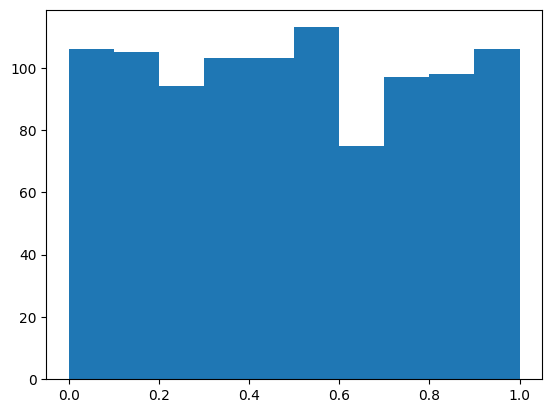

In [60]:
plt.hist(mobile_usage['Gaming_App_Usage_Hours'])

### Plot the relationship between Number_of_apps_used and Daily_Screen_Time_Hours using different types of plots (e.g., scatter plot, line plot, bar graph, etc.).
* Analyze the plots and explain which type of plot best illustrates the relationship between these two variables

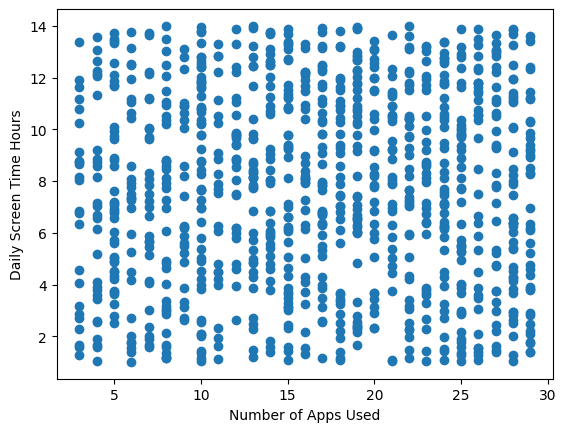

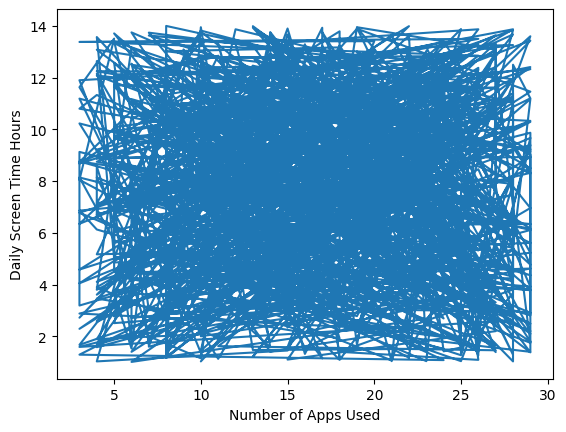

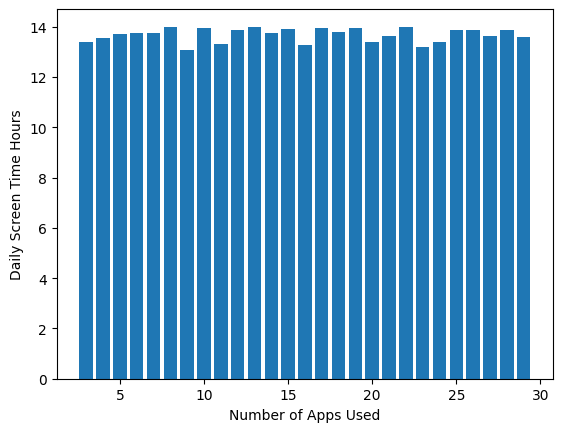

In [51]:
plt.scatter(mobile_usage['Number_of_Apps_Used'],mobile_usage['Daily_Screen_Time_Hours'])
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time Hours')
plt.show()
plt.plot(mobile_usage['Number_of_Apps_Used'],mobile_usage['Daily_Screen_Time_Hours'])
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time Hours')
plt.show()
plt.bar(mobile_usage['Number_of_Apps_Used'],mobile_usage['Daily_Screen_Time_Hours'])
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time Hours')
plt.show()

#

# Broadcasting

*  Use multiple columns from a DataFrame to represent points in an n-dimensional space (take atleast 3 columns).
*  Calculate the Euclidean distance between all pairs of points using:
* A loop-based approach (without broadcasting).
* A vectorized approach using broadcasting.
* Compare the results and performance of both methods.


### To compare the performances use the time module

 A sample code is given below .


In [ ]:
# import time

# # Timing the loop-based approach
# start_time = time.time()
# # (Loop-based distance calculation code here)
# end_time = time.time()
# print(f"Loop-based method took {end_time - start_time:.6f} seconds")

# # Timing the broadcasting approach
# start_time = time.time()
# # (Broadcasting-based distance calculation code here)
# end_time = time.time()
# print(f"Broadcasting method took {end_time - start_time:.6f} seconds")


In [75]:
import time
import numpy as np
#Using Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used of the df given
# Timing the loop-based approach
x=mobile_usage['Total_App_Usage_Hours']
y=mobile_usage['Daily_Screen_Time_Hours']
z=mobile_usage['Number_of_Apps_Used']
a=0
start_time = time.time()
for i in range(1000):
    for j in range(1000):
        a+=(np.sqrt((x[j]-x[i])**2+(y[j]-y[i])**2+(z[j]-z[i])**2))
end_time = time.time()
print(f"Loop-based method took {end_time - start_time:.6f} seconds")
df=pd.DataFrame({'x':x,'y':y,'z':z})
# Timing the broadcasting approach
start_time = time.time()
# (Broadcasting-based distance calculation code here)
points = df.values
diff = points[:, None, :] - points[None, :, :]
dist = np.sqrt(np.sum(diff**2, axis=2))
end_time = time.time()
print(f"Broadcasting method took {end_time - start_time:.6f} seconds")

Loop-based method took 10.580961 seconds
Broadcasting method took 0.025326 seconds


In [ ]:
df=pd.DataFrame({'x':[2,2,3,3],'y':[1,2,2,4],'z':[1,2,3,4]})
print(df.values)
print(df.values[:,None,:])
print(df.values[None,:,:])


[[2 1 1]
 [2 2 2]
 [3 2 3]
 [3 4 4]]
[[[2 1 1]]

 [[2 2 2]]

 [[3 2 3]]

 [[3 4 4]]]
[[[2 1 1]
  [2 2 2]
  [3 2 3]
  [3 4 4]]]
